In [1]:
import pandas as pd

# CSV 파일 읽어오기
df = pd.read_csv('vgsales.csv')

# DataFrame 확인
print(df.head())


   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


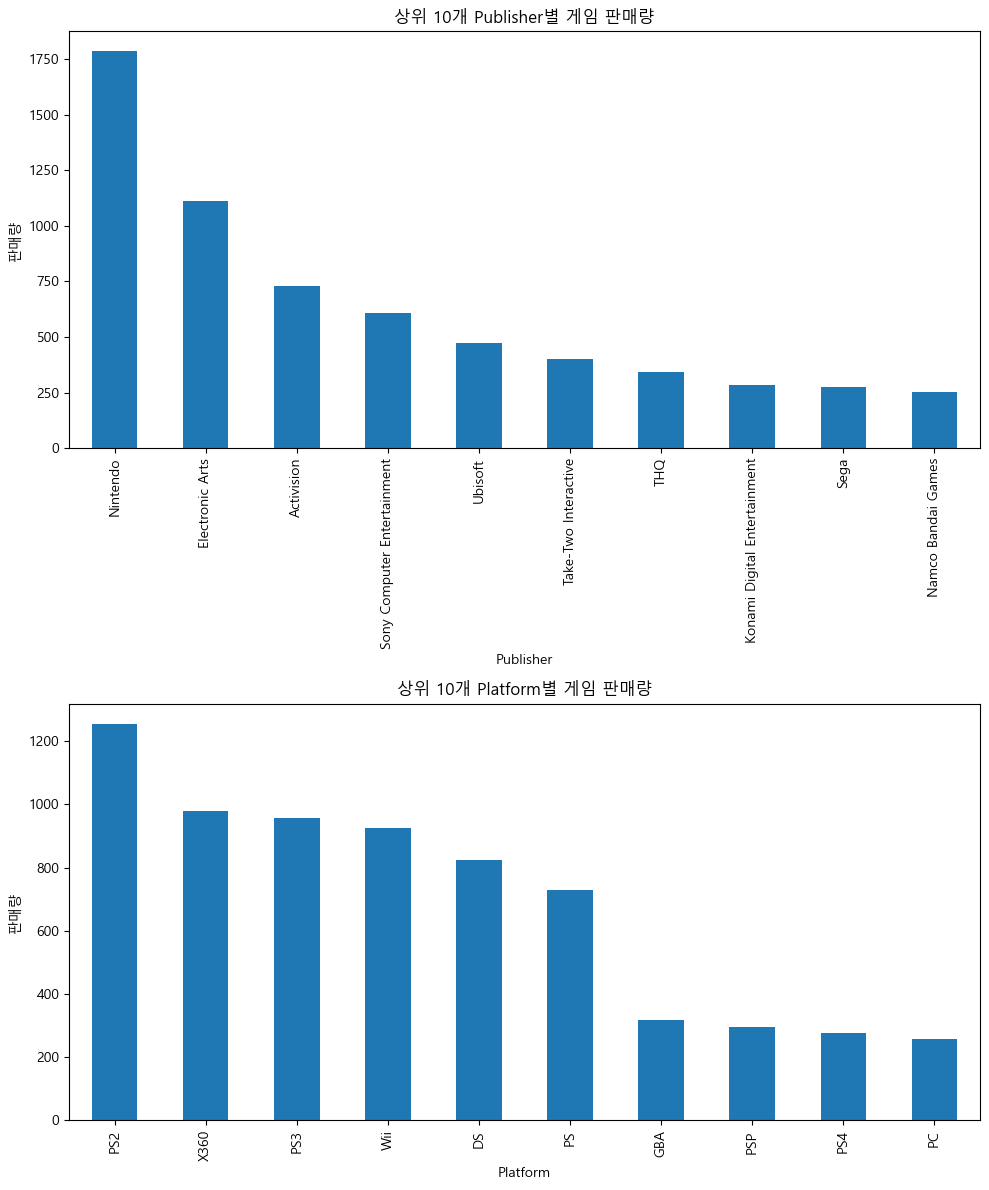

In [3]:
import matplotlib.pyplot as plt

# Publisher와 Platform에 따른 게임 판매량
df_publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
df_platform_sales = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)

# 막대 그래프 그리기
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
#한글 폰트
plt.rc('font', family='Malgun Gothic')

# Publisher(공급사)별 판매량 막대 그래프
ax1 = df_publisher_sales.plot.bar(ax=axes[0])
ax1.set_xlabel('Publisher')
ax1.set_ylabel('판매량')
ax1.set_title('상위 10개 Publisher별 게임 판매량')

# Publisher(공급사)별 판매량 막대 그래프
ax2 = df_platform_sales.plot.bar(ax=axes[1])
ax2.set_xlabel('Platform')
ax2.set_ylabel('판매량')
ax2.set_title('상위 10개 Platform별 게임 판매량')

plt.tight_layout()
plt.show()


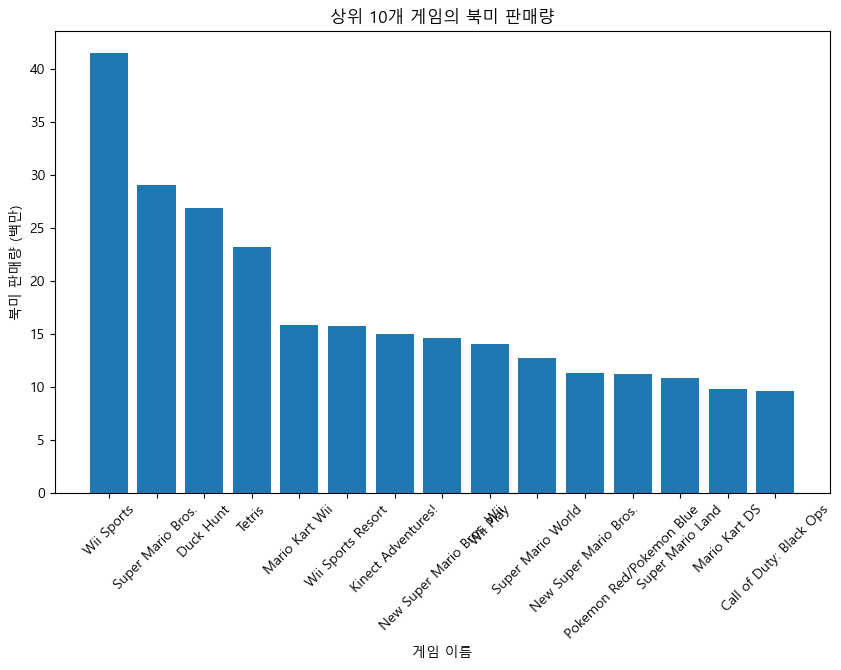

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('vgsales.csv')
# NA_Sales 열을 기준으로 데이터 정렬
sorted_data = df.sort_values('NA_Sales', ascending=False)

# 상위 10개 데이터 추출
top_15 = sorted_data.head(15)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(top_15['Name'], top_15['NA_Sales'])
plt.xlabel('게임 이름')
plt.ylabel('북미 판매량 (백만)')
plt.title('상위 10개 게임의 북미 판매량')
plt.xticks(rotation=45)
plt.show()


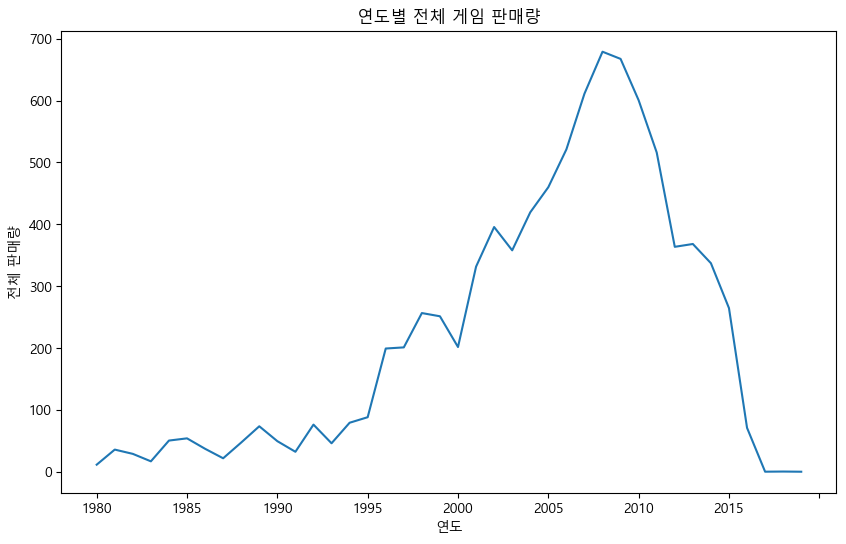

In [6]:
# 연도별 전체 게임 판매량
df_yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# 꺾은선 그래프 그리기
df_yearly_sales.plot.line(figsize=(10, 6))
plt.xlabel('연도')
plt.ylabel('전체 판매량')
plt.title('연도별 전체 게임 판매량')
plt.show()


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.baseball-reference.com/players/o/ohtansh01.shtml" #오타니 쇼헤이 기록
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', id='batting_standard')
if table is not None:
    df = pd.read_html(str(table))[0]
    print(df)
else:
    print("테이블을 찾을 수 없습니다.")


            Year            Age             Tm             Lg    G    PA  \
0           2018             23            LAA             AL  104   367   
1           2019             24            LAA             AL  106   425   
2           2020             25            LAA             AL   44   175   
3           2021             26            LAA             AL  155   639   
4           2022             27            LAA             AL  157   666   
5           2023             28            LAA             AL   83   373   
6          6 Yrs          6 Yrs          6 Yrs          6 Yrs  649  2645   
7  162 Game Avg.  162 Game Avg.  162 Game Avg.  162 Game Avg.  162   660   

     AB    R    H   2B  ...    OPS  OPS+    TB  GDP  HBP  SH  SF  IBB  \
0   326   59   93   21  ...  0.925   151   184    2    2   0   1    2   
1   384   51  110   20  ...  0.848   121   194    6    2   0   4    1   
2   153   23   29    6  ...  0.657    79    56    3    0   0   0    0   
3   537  103  138   26 